In [1]:
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [5]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [6]:
from sklearn.neighbors import KNeighborsRegressor

In [14]:
knr = KNeighborsRegressor(n_neighbors=3)

In [15]:
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [16]:
print(knr.predict([[50]]))

[1033.33333333]


In [17]:
import matplotlib.pyplot as plt

In [18]:
distances, indexes = knr.kneighbors([[50]])

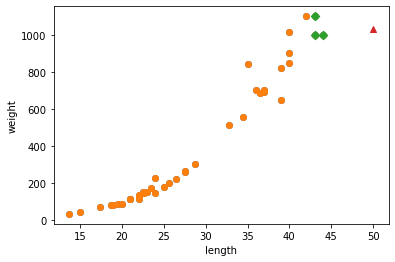

In [19]:
plt.scatter(train_input, train_target)
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

plt.scatter(50, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [23]:
print(knr.predict([[1000]]))

[1033.33333333]


* 아무리 높은 값을 해도 1033값이 나온다.  - 제일 가까운 값들의 평균을 계산하므로

In [25]:
# 해결방법 선형회귀 - 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘이다. 
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(train_input, train_target)

LinearRegression()

In [28]:
print(lr.predict([[50]]))

[1241.83860323]


* 1241은 1.5 kg의 값에 대한 근사치가 나온 것을 알 수 있다. 

In [29]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


* 선형 회귀가 학습한 직선의 기울기와 y절편

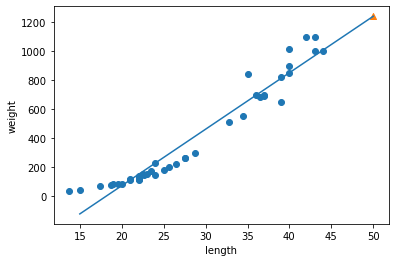

In [34]:
plt.scatter(train_input, train_target)
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])  # 15에서 50까지의 직선을 그린다.

plt.scatter(50, 1241.8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [41]:
print(lr.score(train_input, train_target))        # 훈련 세트
print(lr.score(test_input, test_target))          # 테스트 세트

0.939846333997604
0.8247503123313558


* 훈련 세트와 테스트 세트의 결정계수가 낮으므로 과소적합되었다고 볼 수 있다. 

In [36]:
# 하지만 다른 문제들이 있다. 그래프가 일직선을 그리고 있으므로 
# 농어의 길이가 0에 가까워 질수록 무게는 -이하로 내려갈 수 있다는 사실입니다. 
# 이를 해결하기위해 그래프를 곡선으로 그려야 합니다. (다항 회귀) - a * 길이^2 + b * 길이 + c
# 이를 위해 길이를 제곱한 데이터도 추가로 넣어 주어야 합니다. 

In [37]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [43]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [44]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2,50]]))

[1573.98423528]


* 제일 처음의 선형 회귀보다 더 정확한 값을 측정하였다. 

In [45]:
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


* 이 모델은 1.01 * 길이^2 - 21.6 * 길이 + 116.05의 그래프를 학습하였습니다. 

* 이렇게 다항식을 사용한 선형 회귀를 다항 회귀라고 부릅니다. 

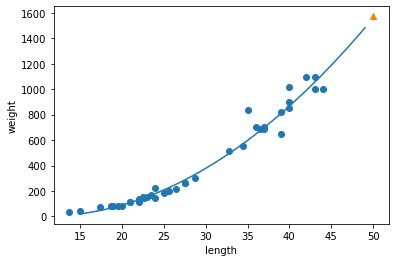

In [54]:
# 15~50까지 산점도 그래프 그리기
point = np.arange(15,50)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
plt.scatter(50,1574,marker = '^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [55]:
print(lr.score(train_poly, train_target))

0.9706807451768623


In [56]:
print(lr.score(test_poly, test_target))

0.9775935108325121


* 훈련세트와 테스트 세트에 대한 점수가 높게 나왔습니다. 
하지만 여전히 테스트 세트의 점수가 조금 더 높습니다. 과소적합이 아직 남아있는 거 같다. 